# Exploratory Data Analysis (EDA)
**Amazon Electronics Troubleshooting Retrieval System**  
CS 410 — Text Information Systems  

**Author:** Jason Fok (ccfok2)  
**Notebook:** `preprocessing/exploratory_data_analysis.ipynb`  
**Purpose:**  
Perform exploratory analysis on the merged and cleaned Amazon Electronics dataset to understand text length, term frequencies, and category distributions.

In [4]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Configuration
pd.set_option('display.max_colwidth', 200)
sns.set(style='whitegrid', context='notebook')
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

DATA_PATH = "../data/processed/reviews_clean.csv"  # adjust if needed

# Load Dataset

In [6]:
df = pd.read_csv(DATA_PATH)
print(f"Loaded dataset: {len(df)} rows")
df.head(3)

Loaded dataset: 50000 rows


,parent_asin,review_text,clean_text
0,B083NRGZMM,Smells like gasoline! Going back! First & most offensive: they reek of gasoline so if you are sensitive/allergic to petroleum products like I am you will want to pass on these. Second: the phone ...,smell like gasoline go back first offensive reek gasoline sensitive allergic petroleum products like want pass second phone adapter useless mine drill far enough able tighten place iphone 12 max s...
1,B07N69T6TM,"Didn’t work at all lenses loose/broken. These didn’t work. Idk if they were damaged in shipping or what, but the lenses were loose or something. I could see half a lens with its edge in the frame ...",work lenses loose break work idk damage ship lenses loose something could see half lens edge frame rest miss look like come loose break toy 4 5 year old boys mom myaboys 8 x 21 kid binoculars chil...
2,B01G8JO5F2,"Excellent! I love these. They even come with a carry case and several sizes of ear bud inserts. Thank heaven! I get ear pain from most, but the smallest buds fit great. They also have a charger ...",excellent love even come carry case several size ear bud insert thank heaven get ear pain smallest bud fit great also charger fit carry case wish come color preferably something bright leave night...


In [10]:
#Check for missing values
df.isna().sum()

parent_asin    0
review_text    0
clean_text     0
dtype: int64

# Basic Data Overview

In [11]:
print("Columns available:", df.columns.tolist())
print("\nUnique parent_asin count:", df["parent_asin"].nunique())

df.describe(include='all').T

Columns available: ['parent_asin', 'review_text', 'clean_text']

Unique parent_asin count: 34349


,count,unique,top,freq
parent_asin,50000,34349,B075X8471B,166
review_text,50000,49988,"Excellent experience. Product matched description Excellent experience. Product matched description, pricing is great, ease of purchase and quick delivery.<br />Will recommend to all of my family ...",2
clean_text,50000,49972,five star love echo dot 2nd generation smart speaker alexa white,4


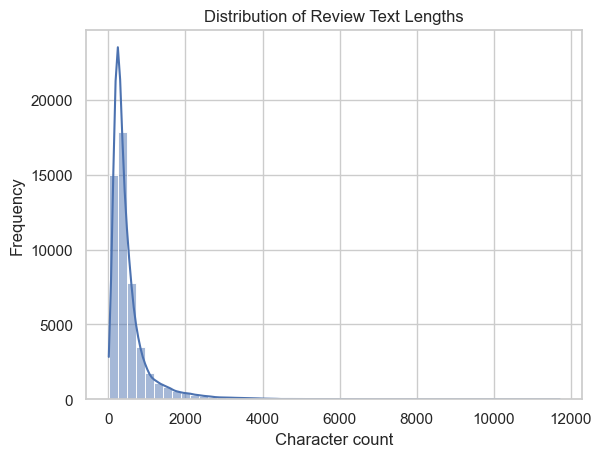

In [12]:
#Distribution of text length
df["text_len"] = df["review_text"].astype(str).apply(len)
sns.histplot(df["text_len"], bins=50, kde=True)
plt.title("Distribution of Review Text Lengths")
plt.xlabel("Character count")
plt.ylabel("Frequency")
plt.show()

# Word Frequency Analysis

C:\Users\Jason_Fok\AppData\Local\Temp\ipykernel_11300\3647665744.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_df, x="count", y="word", palette="Blues_d")


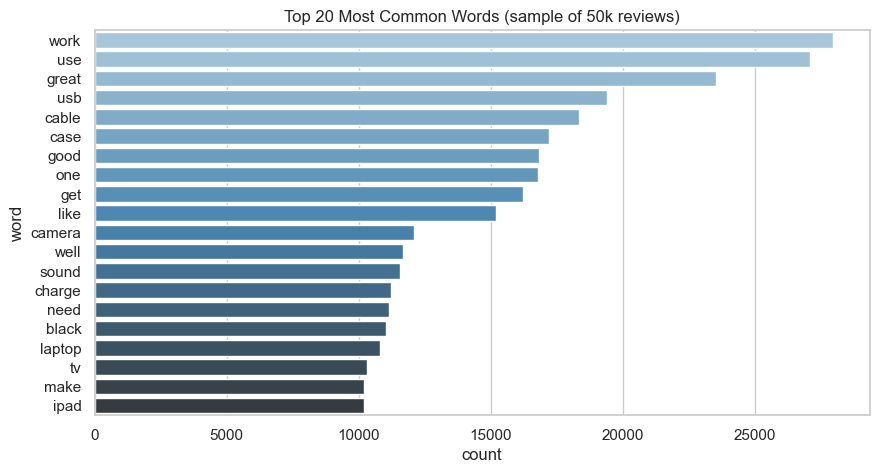

In [13]:
from collections import Counter

def get_top_n_words(texts, n=20):
    all_words = []
    for t in texts:
        words = [w for w in word_tokenize(str(t).lower()) if w.isalpha() and w not in stop_words]
        all_words.extend(words)
    return Counter(all_words).most_common(n)

top_words = get_top_n_words(df["clean_text"].head(50000))
freq_df = pd.DataFrame(top_words, columns=["word", "count"])

plt.figure(figsize=(10,5))
sns.barplot(data=freq_df, x="count", y="word", palette="Blues_d")
plt.title("Top 20 Most Common Words (sample of 50k reviews)")
plt.show()

# Word Cloud (Visualizing Frequent Terms)

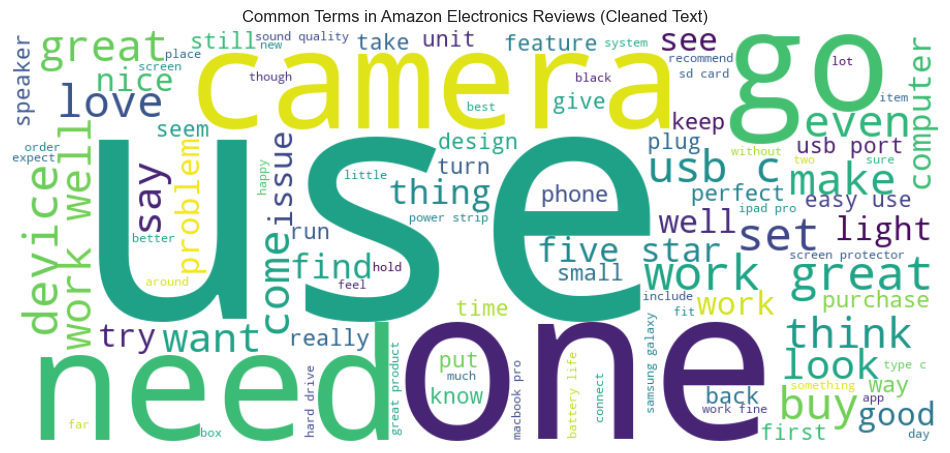

In [14]:
text_sample = " ".join(df["clean_text"].dropna().sample(50000, random_state=42))
wc = WordCloud(width=900, height=400, background_color='white', max_words=100).generate(text_sample)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Common Terms in Amazon Electronics Reviews (Cleaned Text)")
plt.show()

# Vocabulary Size and Average Token Length

In [16]:
def vocab_size(texts):
    vocab = set()
    for t in texts:
        vocab.update(word_tokenize(str(t)))
    return len(vocab)

sample_size = 20000
vocab_estimate = vocab_size(df["clean_text"].sample(sample_size))
print(f"Estimated vocabulary size (sample {sample_size} docs): {vocab_estimate:,}")

avg_tokens = df["clean_text"].apply(lambda x: len(word_tokenize(str(x)))).mean()
print(f"Average tokens per review: {avg_tokens:.2f}")

Estimated vocabulary size (sample 20000 docs): 37,756
Average tokens per review: 57.13
